In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#reading file and looking 1st 5 rows
data =pd.read_csv('all_month.csv')
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-24T02:21:41.496Z,32.377000,-101.471000,5.00,1.20,ml,6.0,232.0,0.100000,0.80,...,2025-05-24T02:23:56.384Z,"14 km N of Big Spring, Texas",earthquake,0.00,NaN,0.300,6.0,automatic,tx,tx
1,2025-05-24T02:07:34.440Z,38.834667,-122.818665,1.86,0.40,md,8.0,89.0,0.013100,0.01,...,2025-05-24T02:09:10.580Z,"8 km NNW of The Geysers, CA",earthquake,0.44,1.26,0.240,9.0,automatic,nc,nc
2,2025-05-24T01:55:04.430Z,38.814499,-122.832497,1.46,0.76,md,7.0,137.0,0.006192,0.01,...,2025-05-24T02:27:16.322Z,"8 km NW of The Geysers, CA",earthquake,0.44,0.85,0.090,10.0,automatic,nc,nc
3,2025-05-24T01:54:13.580Z,38.834667,-122.818169,1.77,0.78,md,14.0,87.0,0.012910,0.01,...,2025-05-24T02:17:22.249Z,"8 km NNW of The Geysers, CA",earthquake,0.30,0.69,0.150,17.0,automatic,nc,nc
4,2025-05-24T01:26:58.060Z,33.501333,-116.507833,12.02,0.87,ml,31.0,57.0,0.079130,0.14,...,2025-05-24T01:30:27.655Z,"16 km ESE of Anza, CA",earthquake,0.18,0.41,0.127,26.0,automatic,ci,ci


In [ ]:
#checking data type of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9229 non-null   object 
 1   latitude         9229 non-null   float64
 2   longitude        9229 non-null   float64
 3   depth            9229 non-null   float64
 4   mag              9229 non-null   float64
 5   magType          9229 non-null   object 
 6   nst              7757 non-null   float64
 7   gap              7757 non-null   float64
 8   dmin             7735 non-null   float64
 9   rms              9228 non-null   float64
 10  net              9229 non-null   object 
 11  id               9229 non-null   object 
 12  updated          9229 non-null   object 
 13  place            9229 non-null   object 
 14  type             9229 non-null   object 
 15  horizontalError  7182 non-null   float64
 16  depthError       9221 non-null   float64
 17  magError      

In [ ]:
#checking which column has null values
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1472
gap                1472
dmin               1494
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2047
depthError            8
magError           1494
magNst             1473
status                0
locationSource        0
magSource             0
dtype: int64

In [ ]:
#to see the statistics of the different field
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9229.000000,9229.000000,9229.000000,9229.000000,7757.000000,7757.000000,7735.000000,9228.000000,7182.000000,9221.000000,7735.000000,7756.000000
mean,38.316722,-111.151389,21.888248,1.530567,23.320871,110.481002,0.507022,0.257942,1.723729,2.333404,0.174403,18.433987
std,20.408104,64.966951,52.873549,1.324211,23.151502,63.360007,2.068393,0.266421,3.259431,5.426043,0.102231,29.455149
min,-63.205500,-179.989300,-3.470000,-2.030000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.776833,-150.037900,2.780000,0.720000,9.000000,65.000000,0.013165,0.070000,0.260000,0.430000,0.105000,7.000000
50%,38.815166,-122.091667,7.138100,1.330000,17.000000,92.000000,0.050090,0.160000,0.430000,0.700000,0.160000,12.000000
75%,51.702200,-112.517833,14.300000,2.000000,28.000000,144.000000,0.123150,0.370000,0.926881,1.680000,0.220000,21.000000
max,82.449700,179.948000,629.500000,7.400000,475.000000,359.000000,38.532000,1.590000,41.690000,62.390000,1.360000,684.000000


<Axes: title={'center': 'earthquake magnitude distribution'}, xlabel='Earthquake magnitude', ylabel='No.of earthquake'>

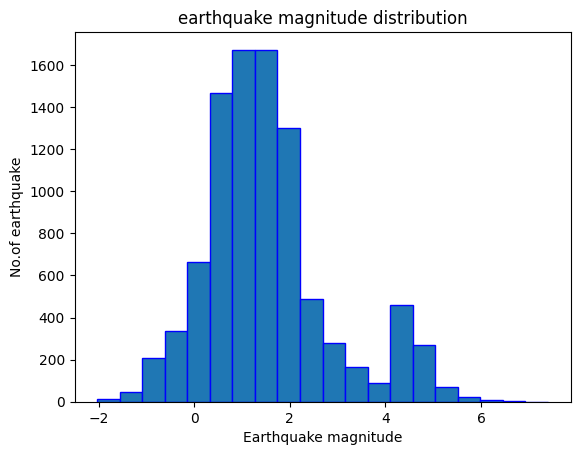

In [ ]:

# getting insight of which magnitude occured most
data['mag'].plot(kind='hist',title="earthquake magnitude distribution", xlabel= 'Earthquake magnitude', ylabel= 'No.of earthquake',bins=20, edgecolor='blue')

In [45]:


location =data.groupby(['locationSource']).count()
location=location.reset_index()
location


,locationSource,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,id,updated,place,type,horizontalError,depthError,magError,magNst,status,magSource
0,ak,1471,1471,1471,1471,1471,1471,0,0,0,...,1471,1471,1471,1471,0,1471,0,0,1471,1471
1,av,861,861,861,861,861,861,861,861,861,...,861,861,861,861,861,861,860,861,861,861
2,ci,1321,1321,1321,1321,1321,1321,1320,1320,1298,...,1321,1321,1321,1321,1320,1320,1317,1321,1321,1321
3,hv,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
4,mb,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246
5,nc,2128,2128,2128,2128,2128,2128,2128,2128,2128,...,2128,2128,2128,2128,2128,2128,2118,2128,2128,2128
6,nm,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
7,nn,264,264,264,264,264,264,264,264,264,...,264,264,264,264,0,264,263,263,264,264
8,ok,311,311,311,311,311,311,311,311,311,...,311,311,311,311,0,311,311,311,311,311
9,pr,270,270,270,270,270,270,270,270,270,...,270,270,270,270,270,270,270,270,270,270


Text(0.5, 1.0, 'No. of earthquakes reported by networks')

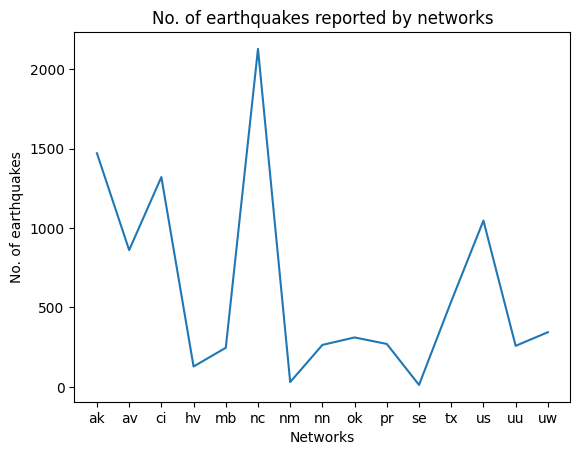

In [ ]:
#getting insights of number of earthquakes reported by different network
fig, ax =plt.subplots()
ax.plot(location['locationSource'], location['mag'])
ax.set_xlabel('Networks')
ax.set_ylabel('No. of earthquakes')
ax.set_title('No. of earthquakes reported by networks')

Text(0.5, 1.0, 'Eearthquake locations')

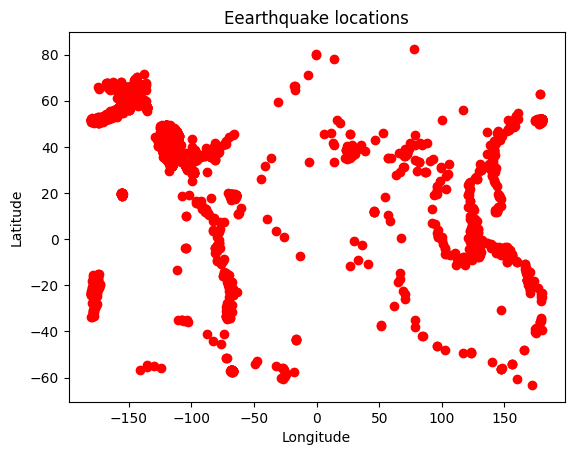

In [ ]:
#getting insight of earthquakes across diferrent longitude and latitude 
fig, ax= plt.subplots()
ax.scatter(data['longitude'], data['latitude'], color='red')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Eearthquake locations')


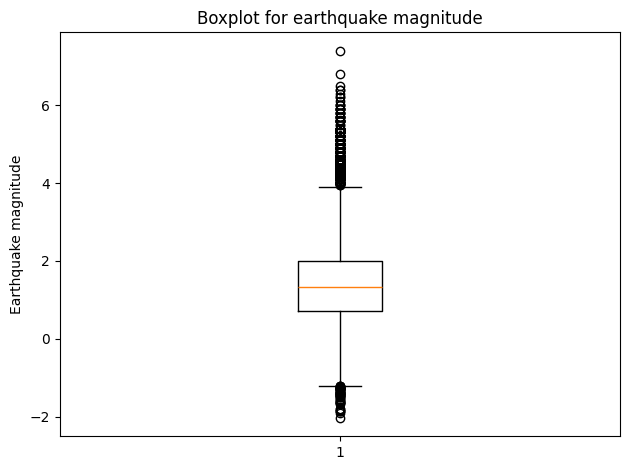

In [ ]:
# checking max, min, mean and outlier by box ploting earthquake magnitude
fig, ax= plt.subplots()
ax.boxplot(data['mag'])
ax.set_ylabel('Earthquake magnitude')
ax.set_title('Boxplot for earthquake magnitude')
fig.tight_layout()


In [ ]:
# checking how poplular are diferrent methods of calculating magnitude
mag_type1 = pd.DataFrame(data['magType'].value_counts())
mag_type1 = mag_type1.reset_index()
mag_type1

,magType,count
0,ml,5767
1,md,2566
2,mb,763
3,mww,81
4,mwr,24
5,mb_lg,11
6,mw,10
7,mh,4
8,mwb,1
9,mlv,1


Text(0.5, 1.0, 'Methods calulating magnitude')

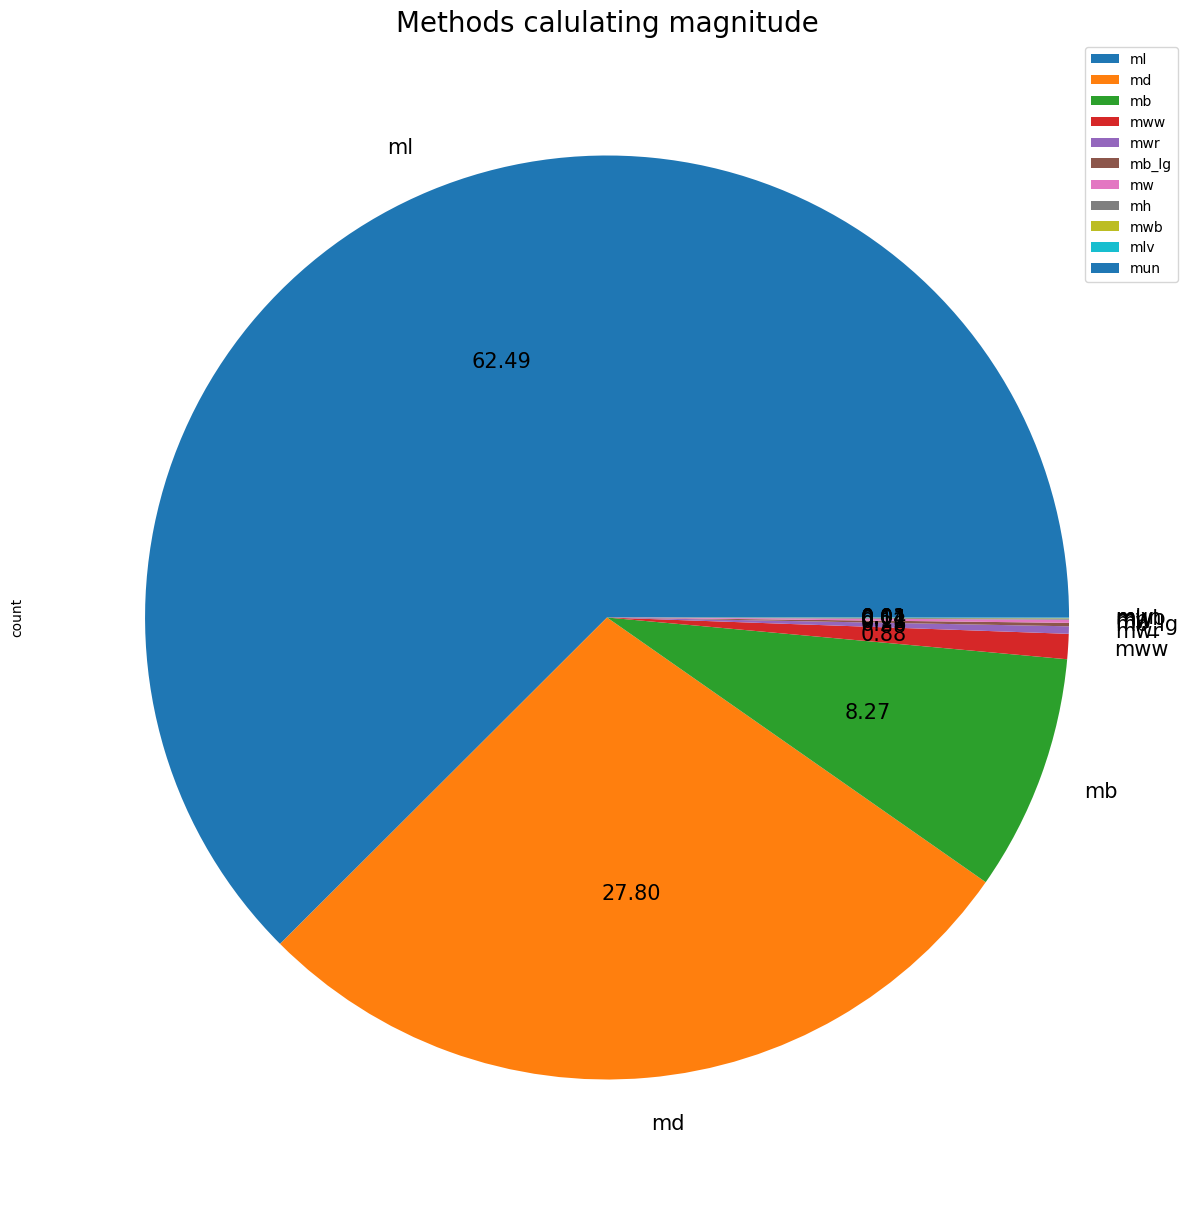

In [ ]:
# ploting a pie chart to know which method contribute what %
fig, ax = plt.subplots()
mag_type1.plot(kind='pie', y = 'count', labels = mag_type1['magType'], autopct = '%.2f', ax=ax, figsize=(15, 15), fontsize= 15)
ax.set_title('Methods calulating magnitude', fontsize=20)

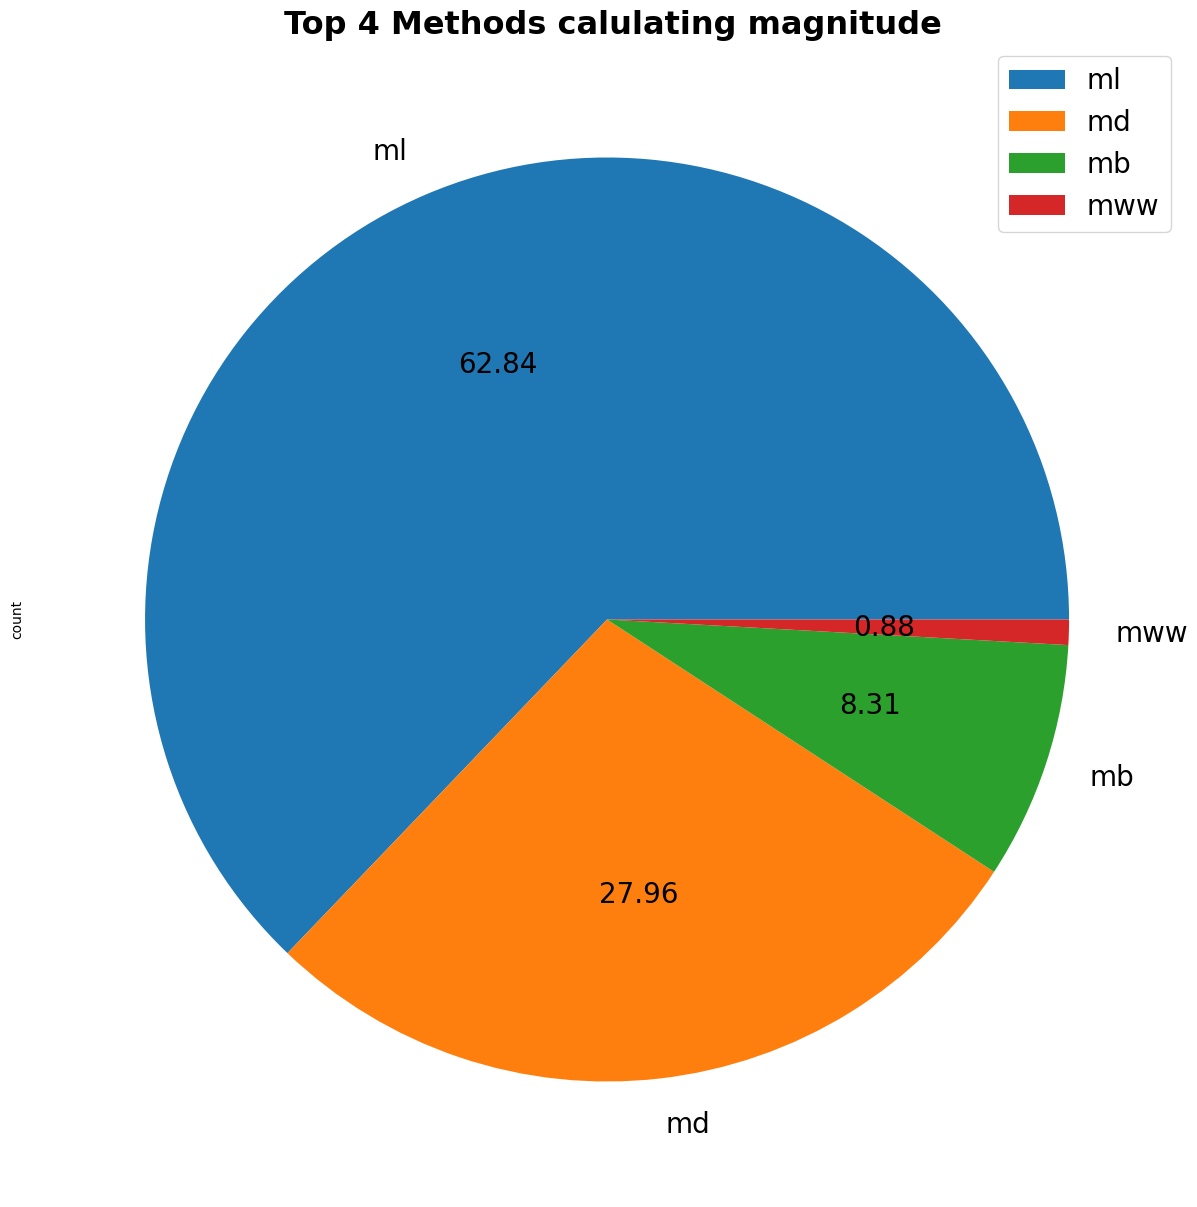

In [ ]:
# to know top 4 methods used to calculate magnitude
fig, ax = plt.subplots()
mag_type1[0:4].plot(kind='pie', y = 'count', labels = mag_type1['magType'], autopct = '%.2f', ax=ax, figsize=(15, 15), fontsize= 20)
ax.set_title(' Top 4 Methods calulating magnitude',fontweight='bold', fontsize=23)
ax.legend(fontsize= 20)

C:\Users\london\AppData\Local\Temp\ipykernel_15256\696180370.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_mag_palce['place'],rotation=90)


Text(0, 0.5, 'earthquake magnitude')

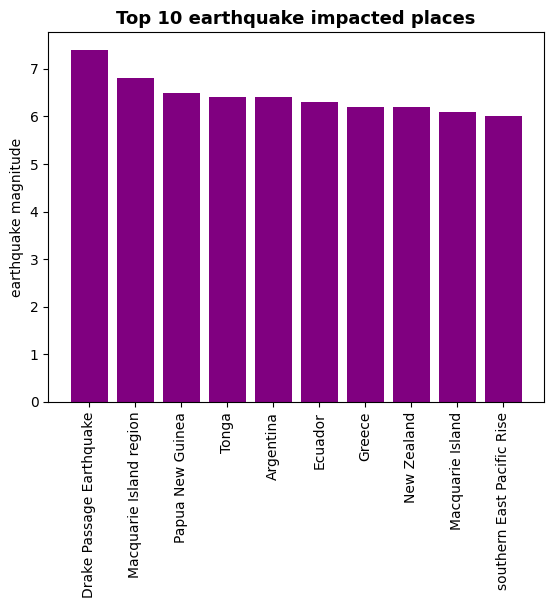

In [209]:
#calculating top 10 countries experienced highest earthquake
top_mag_palce=data.sort_values(by='mag', ascending=False).head(10)
top_mag_palce['place']=['2025 Drake Passage Earthquake'[5:],'Macquarie Island region','88 km ENE of Angoram, Papua New Guinea'[-16:],'137 km W of Neiafu, Tonga'[-5:], '288 km SSE of Ushuaia, Argentina'[-9:],
'15 km NE of Esmeraldas, Ecuador'[-7:],'61 km NNE of Eloúnda, Greece'[-6:],'285 km SW of Bluff, New Zealand'[-11:],'west of Macquarie Island'[8:], 'southern East Pacific Rise']

fig,ax=plt.subplots()
ax.bar(top_mag_palce['place'],top_mag_palce['mag'], color='purple')
ax.set_xticklabels(top_mag_palce['place'],rotation=90)
ax.set_title("Top 10 earthquake impacted places", fontsize=13, fontweight='bold')
ax.set_ylabel('earthquake magnitude')


In [ ]:
#changing the names by taking off the unwanted text 
places=top_mag_palce['place']
places
places=['2025 Drake Passage Earthquake'[5:],'Macquarie Island region','88 km ENE of Angoram, Papua New Guinea'[-16:],'137 km W of Neiafu, Tonga'[-5:], '288 km SSE of Ushuaia, Argentina'[-9:],
'15 km NE of Esmeraldas, Ecuador'[-7:],'61 km NNE of Eloúnda, Greece'[-6:],'285 km SW of Bluff, New Zealand'[-11:],'west of Macquarie Island'[8:], 'southern East Pacific Rise']



In [206]:
a = '88 km ENE of Angoram, Papua New Guinea'[-16:]
print(a)

Papua New Guinea
